In [10]:
import pandas as pd

csv = r'pathtothefile'
with open(csv, 'r') as file:
    df = pd.read_csv(csv)

df.shape

(4733, 24)

In [11]:
print('Shape of the dataset: ',df.shape)
df = df.drop_duplicates(subset=["track_id"], keep="first")
df=df.reset_index(drop=True)
print('Shape of the dataset after duplicate removal: ',df.shape)

Shape of the dataset:  (4733, 24)
Shape of the dataset after duplicate removal:  (4423, 24)


Some statistics about the numerical features of the dataset

In [12]:
df2=df[['popularity','danceability','energy','key','loudness','mode','speechiness','acousticness',
       'instrumentalness','liveness','valence','tempo','duration_ms','time_signature']]
df2.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4.423000e+03,4423.000000
mean,55.092019,0.514973,0.542771,5.240561,-12.898804,0.643455,0.086165,0.402520,0.281570,0.177363,0.433384,118.493249,2.320410e+05,3.857563
std,19.810577,0.219203,0.328058,3.599526,10.563184,0.479033,0.091762,0.393133,0.395660,0.156780,0.282020,31.079566,1.338822e+05,0.514438
min,0.000000,0.000000,0.000020,0.000000,-50.060000,0.000000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,4.516000e+04,0.000000
25%,45.000000,0.351000,0.243500,2.000000,-16.660500,0.000000,0.038500,0.029200,0.000002,0.095000,0.185000,94.096500,1.704395e+05,4.000000
50%,56.000000,0.534000,0.620000,5.000000,-8.315000,1.000000,0.049600,0.229000,0.001770,0.114000,0.414000,120.017000,2.036300e+05,4.000000
75%,69.000000,0.691000,0.826500,8.000000,-5.783500,1.000000,0.088150,0.861000,0.779000,0.197000,0.665000,138.224000,2.556135e+05,4.000000
max,99.000000,0.967000,1.000000,11.000000,0.878000,1.000000,0.935000,0.996000,0.994000,0.979000,0.988000,210.706000,3.815787e+06,5.000000


Most of them range from 0 to 1

Let's print a counter of the different genres

In [13]:
genres=list()
for t in df.iterrows():
    a=t[1][-1]
    l = str(a)
    genres.append(l)

count=dict()
for i in genres:
    if i in count:
        count[i]+=1

    else:
        count[i]=1

print('Total number of genres in the dataset: ',len(set(genres)))
for i in count:
    print(i,': ',count[i],' tracks')

Total number of genres in the dataset:  28
DANCE :  302  tracks
HIPHOP :  337  tracks
KPOP :  50  tracks
NETFLIXSOUNDTRACK :  21  tracks
LATINA :  50  tracks
AMBIENT :  120  tracks
ALTERNATIVE :  85  tracks
LOVESONGS :  135  tracks
ANIMESONGS :  57  tracks
AFRO :  44  tracks
KIDS :  100  tracks
BLUES :  70  tracks
CLASSICAL :  232  tracks
COUNTRY :  98  tracks
SLEEP :  277  tracks
NATURESOUNDS :  131  tracks
FUNK :  75  tracks
JAZZ :  250  tracks
METAL :  100  tracks
PUNK :  181  tracks
REGGAE :  168  tracks
ROCK :  166  tracks
FOCUSING :  300  tracks
GRUNGE :  57  tracks
STONERROCK :  100  tracks
HEAVYMETAL :  145  tracks
RB :  55  tracks
OTHERS :  717  tracks


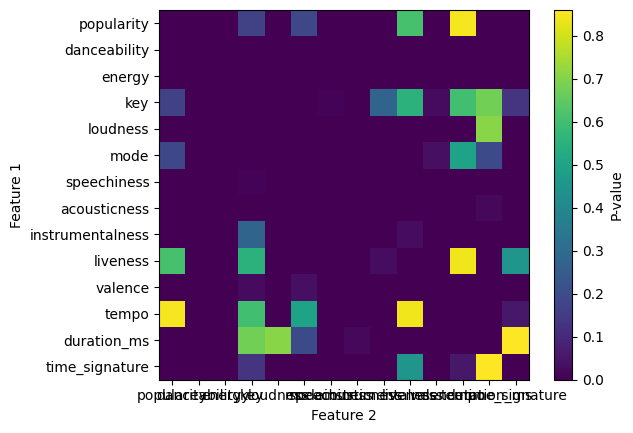

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

l=['popularity','danceability','energy','key','loudness','mode','speechiness','acousticness',
       'instrumentalness','liveness','valence','tempo','duration_ms','time_signature']

num_elements = len(l)
table_data = np.zeros((num_elements, num_elements))

for i in range(num_elements):
    for j in range(num_elements):
        table_data[i, j] = pearsonr(df[l[i]], df[l[j]])[1]

plt.imshow(table_data, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(num_elements), l)
plt.yticks(np.arange(num_elements), l)
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.colorbar(label='P-value')
plt.show()


Most of the features are correlated among each other

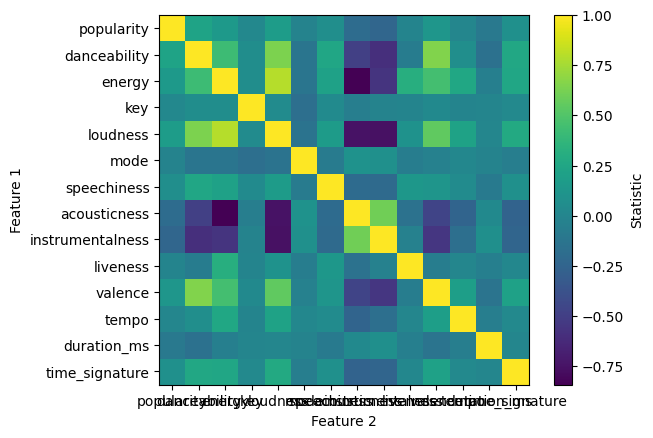

In [15]:
for i in range(num_elements):
    for j in range(num_elements):
        table_data[i, j] = pearsonr(df[l[i]], df[l[j]])[0]

plt.imshow(table_data, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(num_elements), l)
plt.yticks(np.arange(num_elements), l)
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')

plt.colorbar(label='Statistic')
plt.show()


However only for a few of them the correlation is significant

Let's perform some feature engineering: we first normalize the data and then decrease the weight of some features than are less relevant for track analysis

In [16]:

filt_df=df[['popularity','danceability','energy','key','loudness','speechiness','acousticness',
       'instrumentalness','liveness','valence','tempo','duration_ms','time_signature']]
normalized_df=(filt_df-filt_df.mean())/filt_df.std()
normalized_df.loc[:, 'popularity'] = normalized_df['popularity'] / 3
normalized_df.loc[:, 'key']=normalized_df['key']/3
normalized_df.loc[:, 'time_signature']=normalized_df['time_signature']/3
normalized_df.loc[:, 'duration_ms']=normalized_df['duration_ms']/3

normalized_df.describe()

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,4.423000e+03,4.423000e+03,4.423000e+03,4.423000e+03,4.423000e+03,4.423000e+03,4.423000e+03,4.423000e+03,4.423000e+03,4.423000e+03,4.423000e+03,4.423000e+03,4423.000000
mean,-2.570356e-17,-5.751171e-16,-3.855534e-17,-6.024271e-19,2.570356e-17,3.855534e-17,5.140712e-17,1.285178e-17,-1.285178e-17,-1.285178e-17,1.927767e-17,3.212945e-17,0.000000
std,3.333333e-01,1.000000e+00,1.000000e+00,3.333333e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.333333e-01,0.333333
min,-9.269799e-01,-2.349298e+00,-1.654436e+00,-4.853009e-01,-3.517992e+00,-9.390027e-01,-1.023875e+00,-7.116476e-01,-1.038798e+00,-1.536713e+00,-3.812577e+00,-4.652872e-01,-2.499534
25%,-1.698086e-01,-7.480434e-01,-9.122503e-01,-3.000914e-01,-3.561139e-01,-5.194396e-01,-9.496025e-01,-7.116436e-01,-5.253391e-01,-8.807312e-01,-7.849771e-01,-1.533724e-01,0.092293
50%,1.527771e-02,8.679902e-02,2.354141e-01,-2.227707e-02,4.339415e-01,-3.984747e-01,-4.413781e-01,-7.071741e-01,-4.041501e-01,-6.873199e-02,4.902741e-02,-7.073635e-02,0.092293
75%,2.340161e-01,8.030299e-01,8.648767e-01,2.555373e-01,6.735946e-01,2.163324e-02,1.166219e+00,1.257216e+00,1.252544e-01,8.212759e-01,6.348464e-01,5.868965e-02,0.092293
max,7.387969e-01,2.062136e+00,1.393747e+00,5.333516e-01,1.304228e+00,9.250386e+00,1.509614e+00,1.800613e+00,5.113137e+00,1.966585e+00,2.966990e+00,8.922636e+00,0.740250


In [17]:

normalized_df.to_csv(r'C:\Users\User\Desktop\Data_mining\normalized_df.csv', index=False)

In [18]:
normalized_df['genre']=df['genre']
normalized_df.to_csv(r'C:\Users\User\Desktop\Data_mining\normalized_df_with_genres.csv', index=False)